# Assignment 9

### 1. Use rasterio to georeference an image of your choosing (not geospatial) by using rasterio.from_origin to create a transform, an epsg code to define your coordinate system (anything is fine, 4326 is WGS84), and rasterio to write out the image. Bring the image into ArcGIS Pro and include a screenshot of it overlaid on a map along with the assignment.

In [2]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

In [19]:
with rasterio.open('IMG_5819.jpg') as src:
    gt = src.transform
    array = src.read(1)

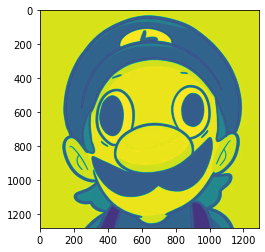

In [21]:
plt.imshow(array)

In [9]:
gt

Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0)

In [29]:
new_gt = rasterio.transform.from_origin(-80.4139, 37.2296, 0.005, 0.005)

In [30]:
new_gt

Affine(0.005, 0.0, -80.4139,
       0.0, -0.005, 37.2296)

In [31]:
with rasterio.open(
    'luigi.tif',
    'w',
    driver='GTiff',
    height=array.shape[0],
    width=array.shape[1],
    count=1,
    dtype=array.dtype,
    crs= rasterio.crs.CRS.from_epsg(4326),
    transform= new_gt
) as dst:
    dst.write(array, 1)

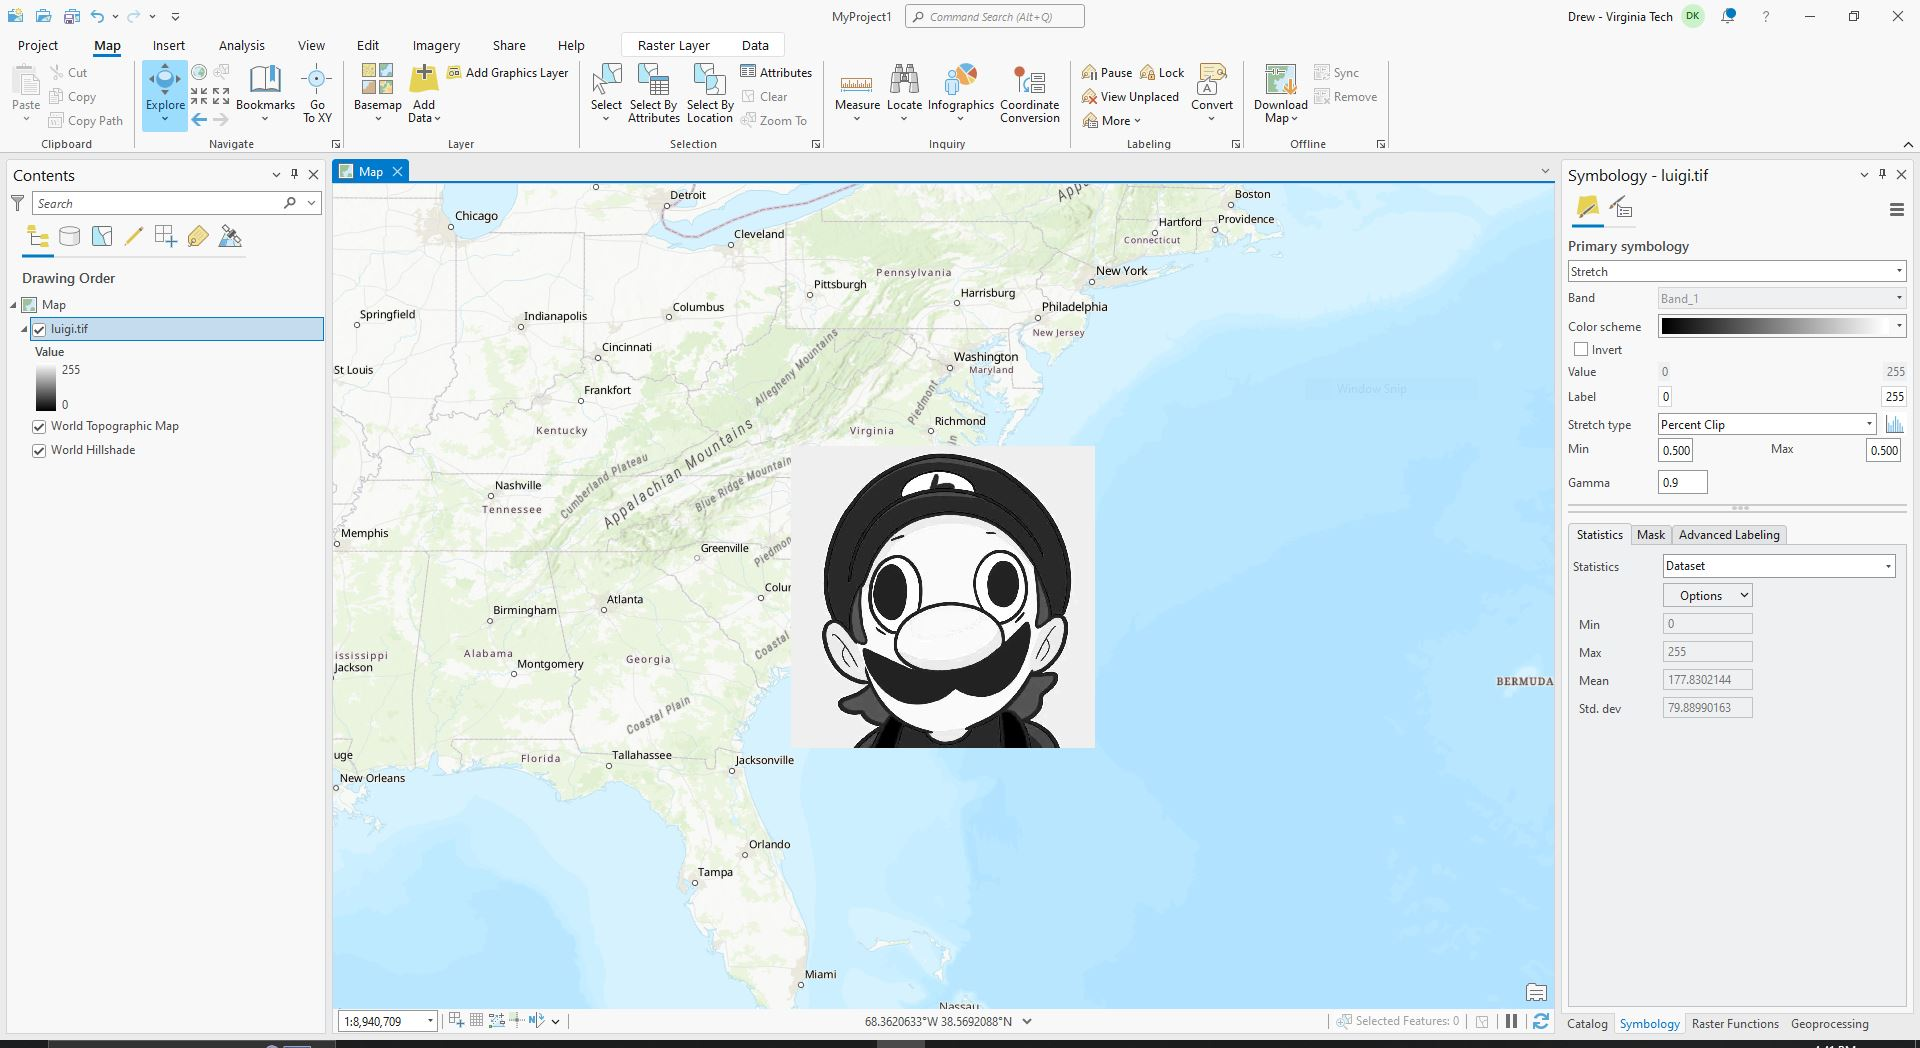

### 2. Review the rasterio documentation and explore five functions not discussed in lecture.

In [6]:
# 1. Show Color interpretation

with rasterio.open('IMG_5819.jpg') as src:
    print(src.colorinterp[0])
    print(src.colorinterp[1])
    print(src.colorinterp[2])

ColorInterp.red
ColorInterp.green
ColorInterp.blue


In [8]:
# 2. Checking bounds of GeoTIF

with rasterio.open('luigi.tif') as src:
    print(src.bounds)

BoundingBox(left=-80.4139, bottom=30.824599999999997, right=-73.9639, top=37.2296)


In [10]:
# 3. Read dataset mask

with rasterio.open('luigi.tif') as src:
    msk = src.read_masks(1)
    print(msk.shape)
    print(msk)

(1281, 1290)
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


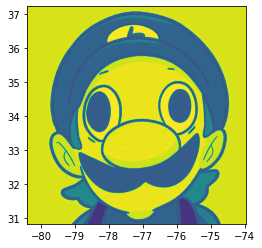

In [11]:
# 4. Plotting with rasterio

from rasterio.plot import show

with rasterio.open('luigi.tif') as src:
    show(src)

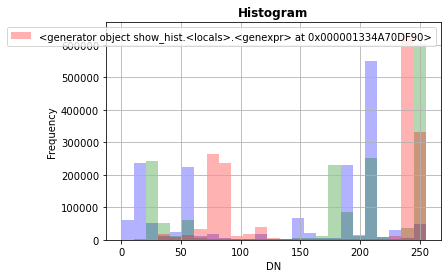

In [15]:
# 5. Making histogram plot with rasterio

from rasterio.plot import show_hist

with rasterio.open('IMG_5819.jpg') as src:
    show_hist(src, bins=25, stacked=False, alpha=0.3, histtype='stepfilled')

### 3. Demonstrate with your own data that you can combine a raster layer of your choice and a geopandas overlay. It can be simple! I might for instance choose some data from Natural Earth.

In [16]:
import geopandas

In [26]:
with rasterio.open('GRAY_50M_SR.tif') as src:
    array = src.read()

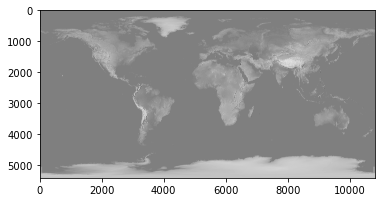

In [28]:
array = np.squeeze(array)
plt.imshow(array, cmap='gray')

In [30]:
df = geopandas.read_file('ne_50m_land.shp')
df.head()

,scalerank,featurecla,min_zoom,geometry
0,0,Land,1.5,"POLYGON ((179.99922 -16.16855, 179.84824 -16.3..."
1,0,Land,4.0,"POLYGON ((177.23418 -17.14707, 177.18281 -17.1..."
2,0,Land,4.0,"POLYGON ((127.37266 0.79131, 127.33838 0.75845..."
3,0,Land,3.0,"POLYGON ((-81.33481 24.65049, -81.36479 24.629..."
4,0,Land,4.0,"POLYGON ((-80.82939 24.80366, -80.84834 24.803..."


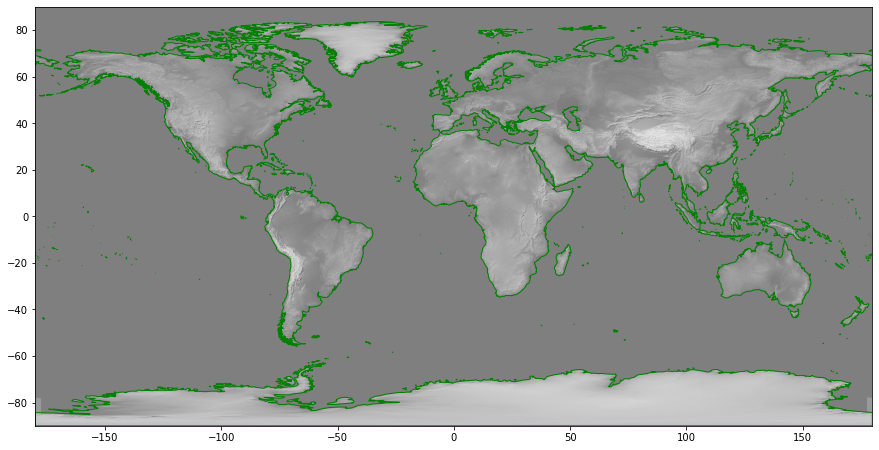

In [34]:
with rasterio.open('GRAY_50M_SR.tif') as src:
    fig, ax = plt.subplots(figsize=(15, 15))
    rasterio.plot.show(src, ax=ax, cmap='gray')
    df.plot(ax=ax, facecolor='none', edgecolor='green')